In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_csv = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_csv = pd.read_csv(clinical_trial_data_to_load)

#mouse_drug_csv.head()
#clinical_trial_csv.head()
# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_drug_csv,clinical_trial_csv,how='inner',left_on='Mouse ID',right_on='Mouse ID')

# Display the data table for preview
combined_dataset.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_grouped = combined_dataset.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']

# Convert to DataFrame
drug_timepoint = drug_timepoint_grouped.mean()
drug_timepoint_df = pd.DataFrame(drug_timepoint)

# Preview DataFrame
drug_timepoint_df.reset_index(inplace=True)

drug_timepoint_df.head()
#drug_timepoint_df.columns


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_of_tumor_volumes = drug_timepoint_grouped.sem()

# Convert to DataFrame
sem_of_tumor_volumes_df = pd.DataFrame(sem_of_tumor_volumes)

# Preview DataFrame
sem_of_tumor_volumes_df.reset_index(inplace=True)
sem_of_tumor_volumes_df.head()
#sem_of_tumor_volumes_df.columns

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [43]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_df = drug_timepoint_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)') 

# Preview that Reformatting worked
pivoted_df.head()
#pivoted_df.columns

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


for column in pivoted_df:
    print(pivoted_df[column])

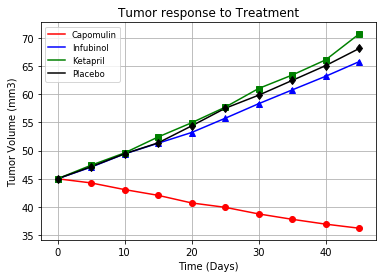

In [49]:
# Generate the Plot (with Error Bars)
x_axis = pivoted_df.index.values
y_capomulin = pivoted_df['Capomulin']
y_infubinol = pivoted_df['Infubinol']
y_ketapril = pivoted_df['Ketapril']
y_placebo = pivoted_df['Placebo']


x_err = 0.2
y_err = 0.3

fig, ax = plt.subplots()

ax.errorbar(x_axis,y_capomulin,xerr = x_err,yerr=y_err,fmt='o',color='red')
Capomulin, = plt.plot(x_axis, y_capomulin, color="red", label='Capomulin')

ax.errorbar(x_axis,y_infubinol,xerr = x_err,yerr=y_err,fmt='^',color='blue')
Infubinol, = plt.plot(x_axis, y_infubinol, color="blue", label='Infubinol')

ax.errorbar(x_axis,y_ketapril,xerr = x_err,yerr=y_err,fmt='s',color='green')
Ketapril, = plt.plot(x_axis, y_ketapril, color="green", label='Ketapril')

ax.errorbar(x_axis,y_placebo,xerr = x_err,yerr=y_err,fmt='d',color='black')
Placebo, = plt.plot(x_axis, y_placebo, color="black", label='Placebo')


ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Tumor response to Treatment')


plt.grid()
plt.legend(handles=[Capomulin,Infubinol,Ketapril,Placebo],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("tumor_response.png")
plt.show()


In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()